In [1]:
import structuralanalysistoolbox as stbox

### Create Model Object

In [2]:
model = stbox.Model(name="my-model-2", interactive=False)

In [3]:
model.add_load_step(analysis="F")

### Import Mesh

In [4]:
model.import_mesh(r'C:\Users\yigit\Desktop\PROJECT-ANSYS\FEM_FOLDER\07_MAPDL\PyMAPDL\__PyMAPDL_Models\_Structural_Analysis_Toolbox_Usage\rod.cdb')
model.plot_mesh()

Widget(value='<iframe src="http://localhost:52038/index.html?ui=P_0x1d10abbcd70_0&reconnect=auto" class="pyvis…

### Select and Assign Material

In [5]:
stbox.matlib.list_materials()

My Steel
My Steel-2
My Steel-3
My Steel-4



In [6]:
steel = model.add_material(mat="My Steel")
model.assign_material("MESH", steel)

### Create a MPC Rigid

In [7]:
model.add_MPC_Rigid(dependent="NS_LOAD_DEPEN", independent="NS_LOAD")

### Show Model Info

In [8]:
model.info()

 ├── Element Types
 │   ├── SOLID185
 │   └── MPC184
 ├── Materials
 │   └── My Steel
 ├── Sets
 │   ├── Node Sets
 │   │   ├── NS_FIX
 │   │   ├── NS_LOAD
 │   │   └── NS_LOAD_DEPEN
 │   └── Element Sets
 │       └── MESH
 ├── Surfaces
 ├── Sections
 ├── Constraints
 │   ├── Linear Couplings
 │   ├── Constraint Equations
 │   ├── MPC
 │   │   └── MPC-1
 │   └── Joints
 ├── Contacts
 └── Load Steps
     ├── Parameters
     ├── Boundary Conditions
     ├── Loads
     ├── Outputs
     └── Restart


### Create Load Steps

In [9]:
load_step_1 = model.add_load_step()
load_step_1.force("NS_LOAD", "X", 3000)
load_step_1.dof("NS_FIX", "ALL", 0)

load_step_1.output("NODAL DOF", "ALL")
load_step_1.output("REACTION LOADS", "ALL")
load_step_1.output("NODAL-AVG PLASTIC STRAINS", "ALL")
load_step_1.output("NODAL-AVG STRESSES", "ALL")
load_step_1.output("EL-NODAL LOAD", "ALL")

In [10]:
# dof and output definitions inherited from the load step 1
load_step_2 = model.add_load_step()
load_step_2.force("NS_LOAD", "X", -2000, operation="ADD")

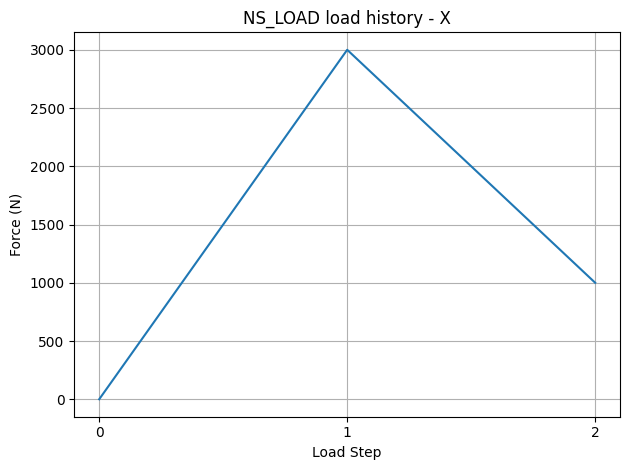

In [11]:
model.plot_load_history(nodes="NS_LOAD", load_type="Force", direction="X")

In [12]:
#model.solve()